<a href="https://www.kaggle.com/code/caruazu/simplicidade?scriptVersionId=121901253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Este ambiente Python 3 vem com muitas bibliotecas analíticas úteis instaladas
# É definido pela imagem kaggle/python Docker: https://github.com/kaggle/docker-python
# Por exemplo, aqui estão vários pacotes úteis para carregar

# import numpy as np
# import pandas as pd
# import tensorflow_hub as hub

# Arquivos de dados de entrada estão disponíveis no diretório somente leitura "../input/"
# Por exemplo, executar isso (clicando em executar ou pressionando Shift+Enter) listará todos os arquivos no diretório de entrada

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# caminho da base
#/kaggle/input/lfwpeople

# Você pode gravar até 20 GB no diretório atual (/kaggle/working/) que é preservado como saída quando você cria uma versão usando "Salvar e executar tudo"
# Você também pode gravar arquivos temporários em /kaggle/temp/, mas eles não serão salvos fora da sessão atuals

# O quão fácil é brincar com IA?

## uma imagem

precisamos de uma imagem para usar nesse nosso exemplo

In [2]:
# aqui vamos pegar meu avatar do github para usar em nossos exemplos

import requests

imagem_url = 'https://avatars.githubusercontent.com/u/39807202'
imagem_resposta = requests.get(imagem_url)

if imagem_resposta.status_code == 200:
    with open('caruazu.jpg', 'wb') as handler:
        handler.write(imagem_resposta.content)
        print('Image salva!')
else:
    print('algo deu errado :(')

Image salva!


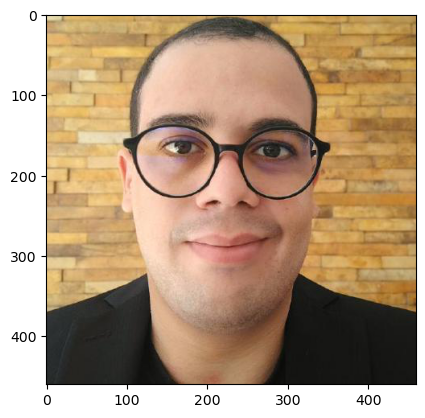

In [3]:
# agora vamos carregar a imagem que salvamos

from PIL import Image
import matplotlib.pyplot as plt

imagem_caminho = '/kaggle/working/caruazu.jpg'
imagem_objeto = Image.open(imagem_caminho)
imagem_grafico = plt.imshow(imagem_objeto)

## um modelo
precisamos pegar um modelo 

In [4]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests


feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-tiny')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')

inputs = feature_extractor(images=imagem_objeto, return_tensors="pt")
outputs = model(**inputs)

/opt/conda/lib/python3.7/site-packages/transformers/models/yolos/feature_extraction_yolos.py:31: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/models/yolos/image_processing_yolos.py:707: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  FutureWarning,


In [5]:

logits = outputs.logits
bboxes = outputs.pred_boxes
print(bboxes)

tensor([[[0.0488, 0.0087, 0.0999, 0.0175],
         [0.0345, 0.5509, 0.0702, 0.9142],
         [0.1037, 0.6673, 0.2049, 0.6188],
         [0.1374, 0.8910, 0.2680, 0.2075],
         [0.3869, 0.9452, 0.1965, 0.1016],
         [0.3958, 0.5117, 0.7922, 0.9558],
         [0.5009, 0.4920, 1.0000, 0.8216],
         [0.6596, 0.8399, 0.5963, 0.3067],
         [0.4996, 0.9912, 1.0000, 0.0178],
         [0.2318, 0.4351, 0.1278, 0.1332],
         [0.2362, 0.6198, 0.2399, 0.4789],
         [0.3622, 0.5900, 0.4818, 0.3775],
         [0.9358, 0.8192, 0.1267, 0.3467],
         [0.5001, 0.5034, 0.9999, 0.9937],
         [0.0172, 0.8227, 0.0331, 0.3279],
         [0.2585, 0.6812, 0.5044, 0.6226],
         [0.5002, 0.5001, 1.0000, 0.9973],
         [0.4795, 0.5040, 0.7381, 0.9793],
         [0.1355, 0.8474, 0.2544, 0.2780],
         [0.5012, 0.5225, 1.0000, 0.8858],
         [0.5041, 0.0275, 1.0000, 0.0570],
         [0.5538, 0.3447, 0.1931, 0.0751],
         [0.9403, 0.9607, 0.1173, 0.0790],
         [0